# Reinforcement Learning - Toy examples with Gym

## FrozenLake

In this Notebook, we will implement $SARSA$ and $Q-Learning$ methods to solve the FrozenLake8x8 environment (https://gym.openai.com/envs/FrozenLake-v0/), using and comparing different policies for exploration. Note that it is a stochastic envivonment since, as mentioned in the documentation, "the ice is slippery, so you won't always move in the direction you intend".

Both algorithms update a tabular estimate of the $Q-function$ using a following update rule:
* $SARSA$ algorithm is an on-policy method using:
$$Q_{t+1}(s_t,a_t) \leftarrow Q_t(s_t,a_t) + \alpha (r_t + \gamma Q_t(s_{t+1}, a_{t+1}) - Q_t(s_t,a_t))$$

* $Q-Learning$ algorithm is an off-policy method using:
$$Q_{t+1}(s_t,a_t) \leftarrow Q_t(s_t,a_t) + \alpha (r_t + \gamma \max_b Q_t(s_{t+1}, b) - Q_t(s_t,a_t))$$

For exploration, we will compare performances between:
* $\epsilon$-greedy policy with a fixed $\epsilon$.
* $\epsilon$-greedy policy with a decaying $\epsilon$.
* softmax exploration assigning a probability for an action to be
performed according to the following rule:
$$P(a_i \vert s) = \frac{e^{\frac{1}{\tau}Q(s,a_j)}}{\sum_j e^{\frac{1}{\tau}Q(s,a_j)}}$$

In [16]:
import sys
sys.path.append("../") # go to parent dir
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import pandas as pd
from auxModules.TD import *

In [5]:
env = gym.make("FrozenLake-v0")

Wall time: 4 ms


### SARSA

Wall time: 10 s


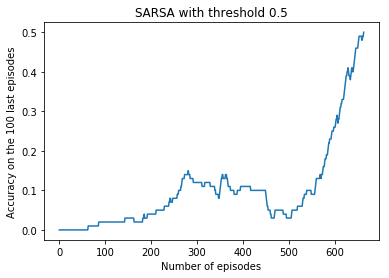

In [8]:
%%time
w = 100
threshold = 0.76
q_table, histAcc, episode = SARSATh(threshold, softmax = True, window=w, tau = 0.001)
plt.plot(np.arange(len(histAcc)), histAcc)

plt.xlabel("Number of episodes")
plt.ylabel("Accuracy on the {} last episodes".format(w))
plt.title("SARSA with threshold {}".format(threshold))

### $Q$-Learning

In [ ]:
%%time
w = 100
threshold = 0.7
q_table, histAcc, episode = QLearningTh(threshold, softmax = True, window=w, tau = 0.001)
print(episode)
plt.plot(np.arange(len(histAcc)), histAcc)

plt.xlabel("Number of episodes")
plt.ylabel("Accuracy on the {} last episodes".format(w))
plt.title("Q-learning  with threshold {}".format(threshold))

In [11]:
%%time
testPolicy(q_table, nEpisode = 1000)

Wall time: 2.83 s


0.334

## Compare methods

In [14]:
recap = pd.DataFrame (columns = ["Accuracy - SARSA", "Nb episodes - SARSA", "Accuracy - QLearning", "Nb episodes - SARSA"])

nEpisodeAccuracy = 1000
threshold = 0.76

### $\epsilon$-greedy with fixed $\epsilon$

In [17]:
n = 5
Eps = 0.1 * np.arange(1, 10, 2)

for eps in tqdm(Eps):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(threshold, epsilon0 = eps, decreaseRate=1)
        ql += testPolicy(q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(threshold, epsilon0 = eps, decreaseRate=1)
        sarsa += testPolicy(q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Fixed $\epsilon$ : $\epsilon$ = {}".format(round(eps,2))] = [sarsa, sarsaEpisode, ql, sarsaEpisode]

 40%|██████████████████████████████████████████████████████████                                                                                       | 2/5 [27:05<39:24, 788.29s/it]

KeyboardInterrupt: 

### $\epsilon$-greedy with decaying $\epsilon$

In [26]:
n = 5
DR = [0.9, 0.99, 0.999]
eps = 0.9

for dr in tqdm(DR):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(threshold, epsilon0 = eps, decreaseRate=dr)
        ql += testPolicy(q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(threshold, epsilon0 = eps, decreaseRate=dr)
        sarsa += testPolicy(q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Decaying-$\epsilon$ : decaying rate = {}".format(dr)] = [sarsa, sarsaEpisode, ql, sarsaEpisode]

### Softmax

In [22]:
n = 5

for t in tqdm([1, 0.1, 0.01, 0.001]):
    sarsa = 0
    sarsaEpisode = 0
    ql = 0
    qEpisode = 0
    for _ in range(n):
        q_table, histAcc, qEp = QLearningTh(threshold, softmax = True, tau = t)
        ql += testPolicy(q_table, nEpisodeAccuracy)
        qEpisode += qEp
        q_table, histAcc, sarsaEp  = SARSATh(threshold, softmax = True, tau = t)
        sarsa += testPolicy(q_table, nEpisodeAccuracy)
        sarsaEpisode += sarsaEp
    sarsa /= n
    sarsaEpisode /= n
    qEpisode /= n
    ql /= n
    recap.loc["Softmax : $\tau$ = {}".format(t)] = [sarsa, sarsaEpisode, ql, sarsaEpisode]

,Accuracy - SARSA,Accuracy - QLearning
Fixed $\epsilon$ : $\epsilon$ = 0.1,0.6433,0.5647
Fixed $\epsilon$ : $\epsilon$ = 0.2,0.7481,0.6517
Fixed $\epsilon$ : $\epsilon$ = 0.3,0.6477,0.3307
Fixed $\epsilon$ : $\epsilon$ = 0.4,0.6386,0.5152
Fixed $\epsilon$ : $\epsilon$ = 0.5,0.6995,0.3537
Fixed $\epsilon$ : $\epsilon$ = 0.6,0.7355,0.5556
Fixed $\epsilon$ : $\epsilon$ = 0.7,0.7075,0.4808
Fixed $\epsilon$ : $\epsilon$ = 0.8,0.6889,0.5127
Fixed $\epsilon$ : $\epsilon$ = 0.9,0.7062,0.4885
Decaying-$\epsilon$ : decaying rate = 0.9,0.7413,0.4818
